# Import the modules


In this part we import the *sys module*, which provides access to system-specific parameters and functions.

- **This module uses the *sys.executable* attribute to determine the path to the Python interpreter currently running the script**.
- **The *!{...}* syntax is used to execute shell commands directly from within Python code (commonly used in Jupyter notebooks or IPython).** 
- **It installs two Python packages using pip:**
    - *nlp_rake*: A package for extracting keywords from text using the Rapid Automatic Keyword Extraction (RAKE) algorithm.
     - *wordcloud*: A package for creating word clouds from text data.

In [ ]:
import sys
!{sys.executable} -m pip install nlp_rake
!{sys.executable} -m pip install wordcloud

# Read the page

In [16]:
url = 'https://en.wikipedia.org/wiki/Hurricane_Harvey'

It imports the requests module, which allows you to make HTTP requests in Python.
The requests.get(url) line sends an HTTP GET request to the specified url.
The content attribute of the response object contains the raw bytes of the server’s response.
The .decode('utf-8') method converts these bytes into a UTF-8 encoded string.
Finally, it prints the first 1000 characters of the decoded text.
Remember that when you receive data in a response using the Requests library, it is initially received as bytes. If the response contains non-ASCII characters, you need to decode it from UTF-8 format into a string using .decode('utf-8').

In [26]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Hurricane Harvey - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature


The code imports the HTMLParser class from the html.parser module. This class is used for parsing HTML and extracting information from it.
It defines a custom class called MyHTMLParser, which inherits from HTMLParser.

Inside MyHTMLParser, there are three methods:

handle_starttag(self, tag, attrs): 

This method is called when the parser encounters a start tag (e.g., <script> or <style>). If the tag is one of these, it sets the self.script flag to True.

handle_endtag(self, tag): 

This method is called when the parser encounters an end tag. If the tag is <script> or <style>, it sets the self.script flag back to False.
handle_data(self, data): This method is called when the parser encounters data (text content) between tags. If the data is empty or if the self.script flag is True, it returns without doing anything. Otherwise, it appends the data (with [ edit ] removed) to the self.res attribute.
An instance of MyHTMLParser is created with the name parser.
The parser.feed(text) line processes the input text using the custom parser.
Finally, the modified text (stored in parser.res) is printed, showing the first 1000 characters.
The purpose of this code appears to be cleaning up HTML content by removing script and style tags and extracting visible text. The handle_data method ensures that only relevant text is included in the result.

In [27]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Hurricane Harvey - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Meteorological history 2 Preparations Toggle Preparations subsection 2.1 Caribbean and Latin America 2.2 United States 2.2.1 Texas 2.2.2 Louisiana 2.2.3 Video briefings by officials 3 Impacts in the Caribbean and Latin America 4 Impacts in the United States Toggle Impacts in the United States subsection 4.1 Texas 4.1.1 Landfall area 4.1.2 Houston metropolitan area flooding 4.1.3 Deep East Texas and Beaumont to Port Arthur area 4.2 Louisiana 4.3 Elsewhere 4.4 Energy production 4.5 Sports 5 Aftermath Toggle Aftermath subsection 5.1 Texas 5.2 Econ

In [28]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=5,min_chars=10)
res = extractor.apply(text)
res

[('hurricane harvey', 4.0),
 ('made landfall', 4.0),
 ('major hurricane', 4.0),
 ('united states', 4.0),
 ('saint vincent', 4.0),
 ('rio grande', 4.0),
 ('port mansfield', 4.0),
 ('high island', 4.0),
 ('grand isle', 4.0),
 ('ef1 tornado', 4.0),
 ('harris county', 4.0),
 ('climate change', 4.0),
 ('york times', 4.0),
 ('weather channel', 4.0),
 ('houston chronicle', 4.0),
 ('national centers', 4.0),
 ('environmental information', 4.0),
 ('cite report', 4.0),
 ('washington post', 3.8),
 ('september 1', 1.0),
 ('september 3', 1.0),
 ('additionally', 1.0),
 ('september 2', 1.0),
 ('september 8', 1.0),
 ('september 10', 1.0),
 ('september 4', 1.0)]

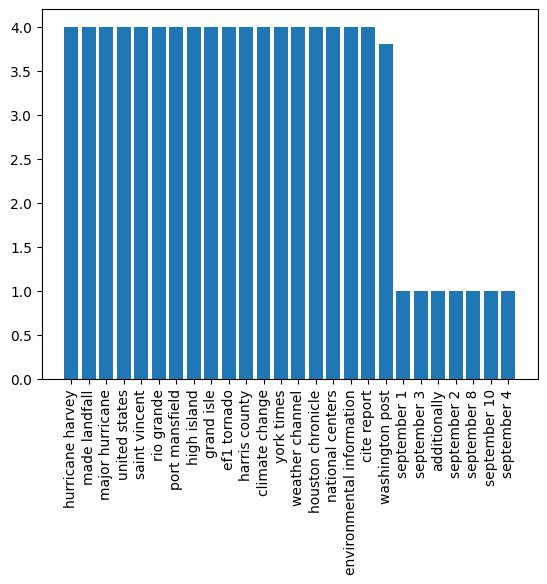

In [29]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

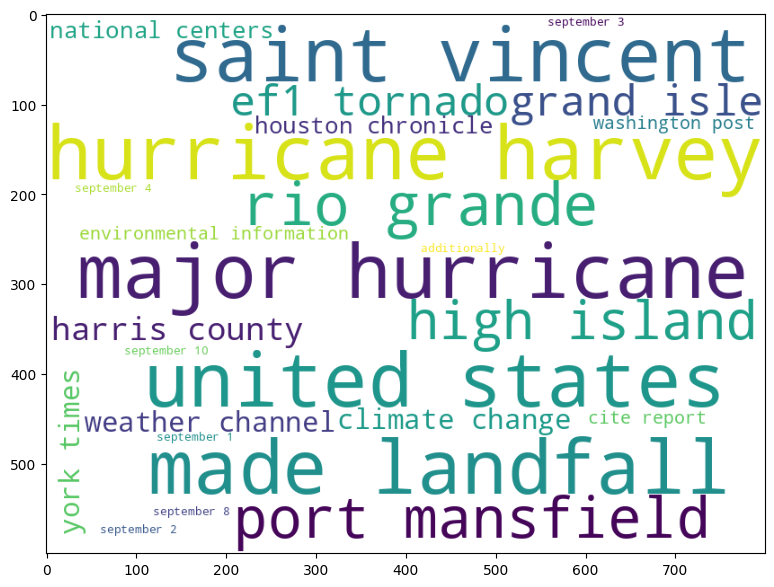

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

# Plot the picture

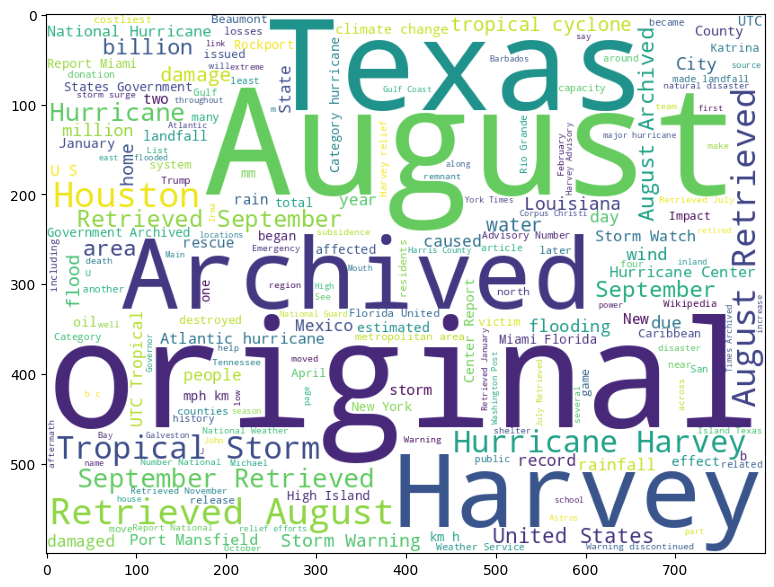

In [33]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))


In [34]:
wc.generate(text).to_file('ds_wordcloud.png')